In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
get_data_dir = os.path.join(parent_dir, 'get_data')
data_dir = os.path.join(get_data_dir, 'output')
file_path = os.path.join(data_dir, 'battles.csv')

output_dir = os.path.join(cwd, 'output')
os.makedirs(output_dir, exist_ok=True)

data = pd.read_csv(file_path)

display(data)

,Battle Time,Mode,Map,Type,Result,My Tag,My Brawler,"Tag 1,1","Brawler 1,1","Tag 1,2","Brawler 1,2","Tag 1,3","Brawler 1,3","Tag 2,1","Brawler 2,1","Tag 2,2","Brawler 2,2","Tag 2,3","Brawler 2,3"
0,20240817T010217.000Z,hotZone,Dueling Beetles,soloRanked,victory,2028QGJ99,MR. P,#LJRR8R0LR,CROW,#9GJ9RPRJ0,BROCK,#28QGQ2CVJ,FANG,#2028QGJ99,MR. P,#PUVGVLQYQ,LARRY & LAWRIE,#GVQYPJ0,JESSIE
1,20240817T010026.000Z,hotZone,Dueling Beetles,soloRanked,victory,2028QGJ99,MR. P,#LJRR8R0LR,CROW,#9GJ9RPRJ0,BROCK,#28QGQ2CVJ,FANG,#2028QGJ99,MR. P,#PUVGVLQYQ,LARRY & LAWRIE,#GVQYPJ0,JESSIE
2,20240817T005447.000Z,knockout,Belle's Rock,soloRanked,defeat,2028QGJ99,DYNAMIKE,#88LY2GPPJ,SHELLY,#2028QGJ99,DYNAMIKE,#2P0UP2800,SPROUT,#220YV8R08,PIPER,#G2J2G09R,MORTIS,#2VRQR0R0,GROM
3,20240817T005323.000Z,knockout,Belle's Rock,soloRanked,defeat,2028QGJ99,DYNAMIKE,#88LY2GPPJ,SHELLY,#2028QGJ99,DYNAMIKE,#2P0UP2800,SPROUT,#220YV8R08,PIPER,#G2J2G09R,MORTIS,#2VRQR0R0,GROM
4,20240817T005007.000Z,bounty,Hideout,soloRanked,defeat,2028QGJ99,MELODIE,#9YVYURQLR,MANDY,#9JVV09YGJ,GENE,#9UR2PUR9P,SPROUT,#2028QGJ99,MELODIE,#2P0UP2800,BELLE,#89ULGR2C0,BYRON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,20240818T231342.000Z,bounty,Canal Grande,soloRanked,defeat,YGQYGCR,GENE,#LJY9PR9R,SQUEAK,#PPQUQJG8,TICK,#YGQYGCR,GENE,#LGPVLUL0C,LARRY & LAWRIE,#PQP2GR89,RICO,#980JLYPPR,CHESTER
2315,20240818T230941.000Z,brawlBall,Pinball Dreams,soloRanked,victory,YGQYGCR,GENE,#20GVVVQY,JESSIE,#Y822CCVLU,CARL,#9C2JRGVYP,TICK,#YGQYGCR,GENE,#LJY9PR9R,BUSTER,#PPQUQJG8,GALE
2316,20240818T230828.000Z,brawlBall,Pinball Dreams,soloRanked,victory,YGQYGCR,GENE,#20GVVVQY,JESSIE,#Y822CCVLU,CARL,#9C2JRGVYP,TICK,#YGQYGCR,GENE,#LJY9PR9R,BUSTER,#PPQUQJG8,GALE
2317,20240819T022037.000Z,hotZone,Parallel Plays,soloRanked,defeat,YP8UCJ2QC,DYNAMIKE,#QG922YGU8,LARRY & LAWRIE,#RLLRV8RR8,BUSTER,#2U2P8YPRY,CHESTER,#YP8UCJ2QC,DYNAMIKE,#G8Y82PP2C,KIT,#PCUU80LL8,RICO


In [3]:
victors = []

for row in data.itertuples(index=False):
    team1 = [row[8], row[10], row[12]]
    team2 = [row[14], row[16], row[18]]

    if row[4] == 'victory':
        victor = 1 if row[5] in set(team1) else 2
    elif row[4] == 'defeat':
        victor = 2 if row[5] in set(team1) else 1
    else:
        victor = 0
    
    victors.append(victor)

df = data[['Mode', 'Map']]
df.insert(2, 'Victor', victors)
df = pd.concat([df, data.iloc[:, range(8, 19, 2)]], axis=1)

display(df)

,Mode,Map,Victor,"Brawler 1,1","Brawler 1,2","Brawler 1,3","Brawler 2,1","Brawler 2,2","Brawler 2,3"
0,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
1,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
2,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
3,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
4,bounty,Hideout,1,MANDY,GENE,SPROUT,MELODIE,BELLE,BYRON
...,...,...,...,...,...,...,...,...,...
2314,bounty,Canal Grande,1,SQUEAK,TICK,GENE,LARRY & LAWRIE,RICO,CHESTER
2315,brawlBall,Pinball Dreams,2,JESSIE,CARL,TICK,GENE,BUSTER,GALE
2316,brawlBall,Pinball Dreams,2,JESSIE,CARL,TICK,GENE,BUSTER,GALE
2317,hotZone,Parallel Plays,1,LARRY & LAWRIE,BUSTER,CHESTER,DYNAMIKE,KIT,RICO


In [4]:
brawlers = sorted(list(set(df.iloc[:, 3:].to_numpy().ravel())))

winrates = pd.DataFrame({'Wins': [0]*len(brawlers), 'Games': [0]*len(brawlers)})
winrates.insert(0, 'Name', brawlers)

indices = {}

for i in range(len(winrates['Name'])):
    indices[winrates.loc[i, 'Name']] = i

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler in team1:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 1:
            winrates.loc[indices[brawler], 'Wins'] += 1

    for brawler in team2:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 2:
            winrates.loc[indices[brawler], 'Wins'] += 1

rates = winrates['Wins'].div(winrates['Games'])
winrates.insert(3, 'Win Rates', rates)

display(winrates)

,Name,Wins,Games,Win Rates
0,8-BIT,27,53,0.509434
1,AMBER,82,191,0.429319
2,ANGELO,174,374,0.465241
3,ASH,10,20,0.500000
4,BARLEY,179,344,0.520349
...,...,...,...,...
77,STU,84,182,0.461538
78,SURGE,151,300,0.503333
79,TARA,18,39,0.461538
80,TICK,67,149,0.449664


,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,0.000000,1.000000,NaN,NaN,0.000000,0.500000,0.000000,NaN,NaN,...,0.500000,0.000000,NaN,NaN,NaN,NaN,NaN,0.800000,NaN,NaN
AMBER,1.0,NaN,0.333333,0.666667,0.333333,NaN,0.500000,0.333333,0.400000,0.727273,...,0.233333,NaN,0.500000,0.600000,0.0,0.222222,0.590909,NaN,NaN,0.0
ANGELO,0.0,0.666667,NaN,NaN,0.500000,NaN,0.441860,0.466667,0.500000,NaN,...,0.400000,0.666667,0.636364,0.629630,NaN,0.428571,0.428571,NaN,0.600,NaN
ASH,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,0.666667,0.333333,NaN,...,0.666667,NaN,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,0.0
BARLEY,NaN,0.666667,0.500000,NaN,NaN,0.800000,0.400000,0.518519,0.380952,NaN,...,0.625000,0.500000,0.625000,0.533333,0.0,0.500000,0.628571,NaN,0.625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.777778,0.571429,NaN,0.500000,0.666667,0.666667,0.333333,0.600000,NaN,...,0.424242,0.000000,0.000000,NaN,NaN,NaN,0.230769,0.333333,0.700,NaN
SURGE,NaN,0.409091,0.571429,NaN,0.371429,1.000000,1.000000,0.545455,0.500000,1.000000,...,0.465517,NaN,0.473684,0.400000,NaN,0.769231,NaN,0.333333,1.000,0.5
TARA,0.2,NaN,NaN,NaN,NaN,NaN,0.000000,0.500000,NaN,NaN,...,0.400000,NaN,NaN,NaN,NaN,0.666667,0.666667,NaN,NaN,NaN
TICK,NaN,NaN,0.400000,NaN,0.375000,1.000000,0.684211,NaN,NaN,1.000000,...,0.000000,0.333333,0.666667,0.647059,0.2,0.300000,0.000000,NaN,NaN,0.0


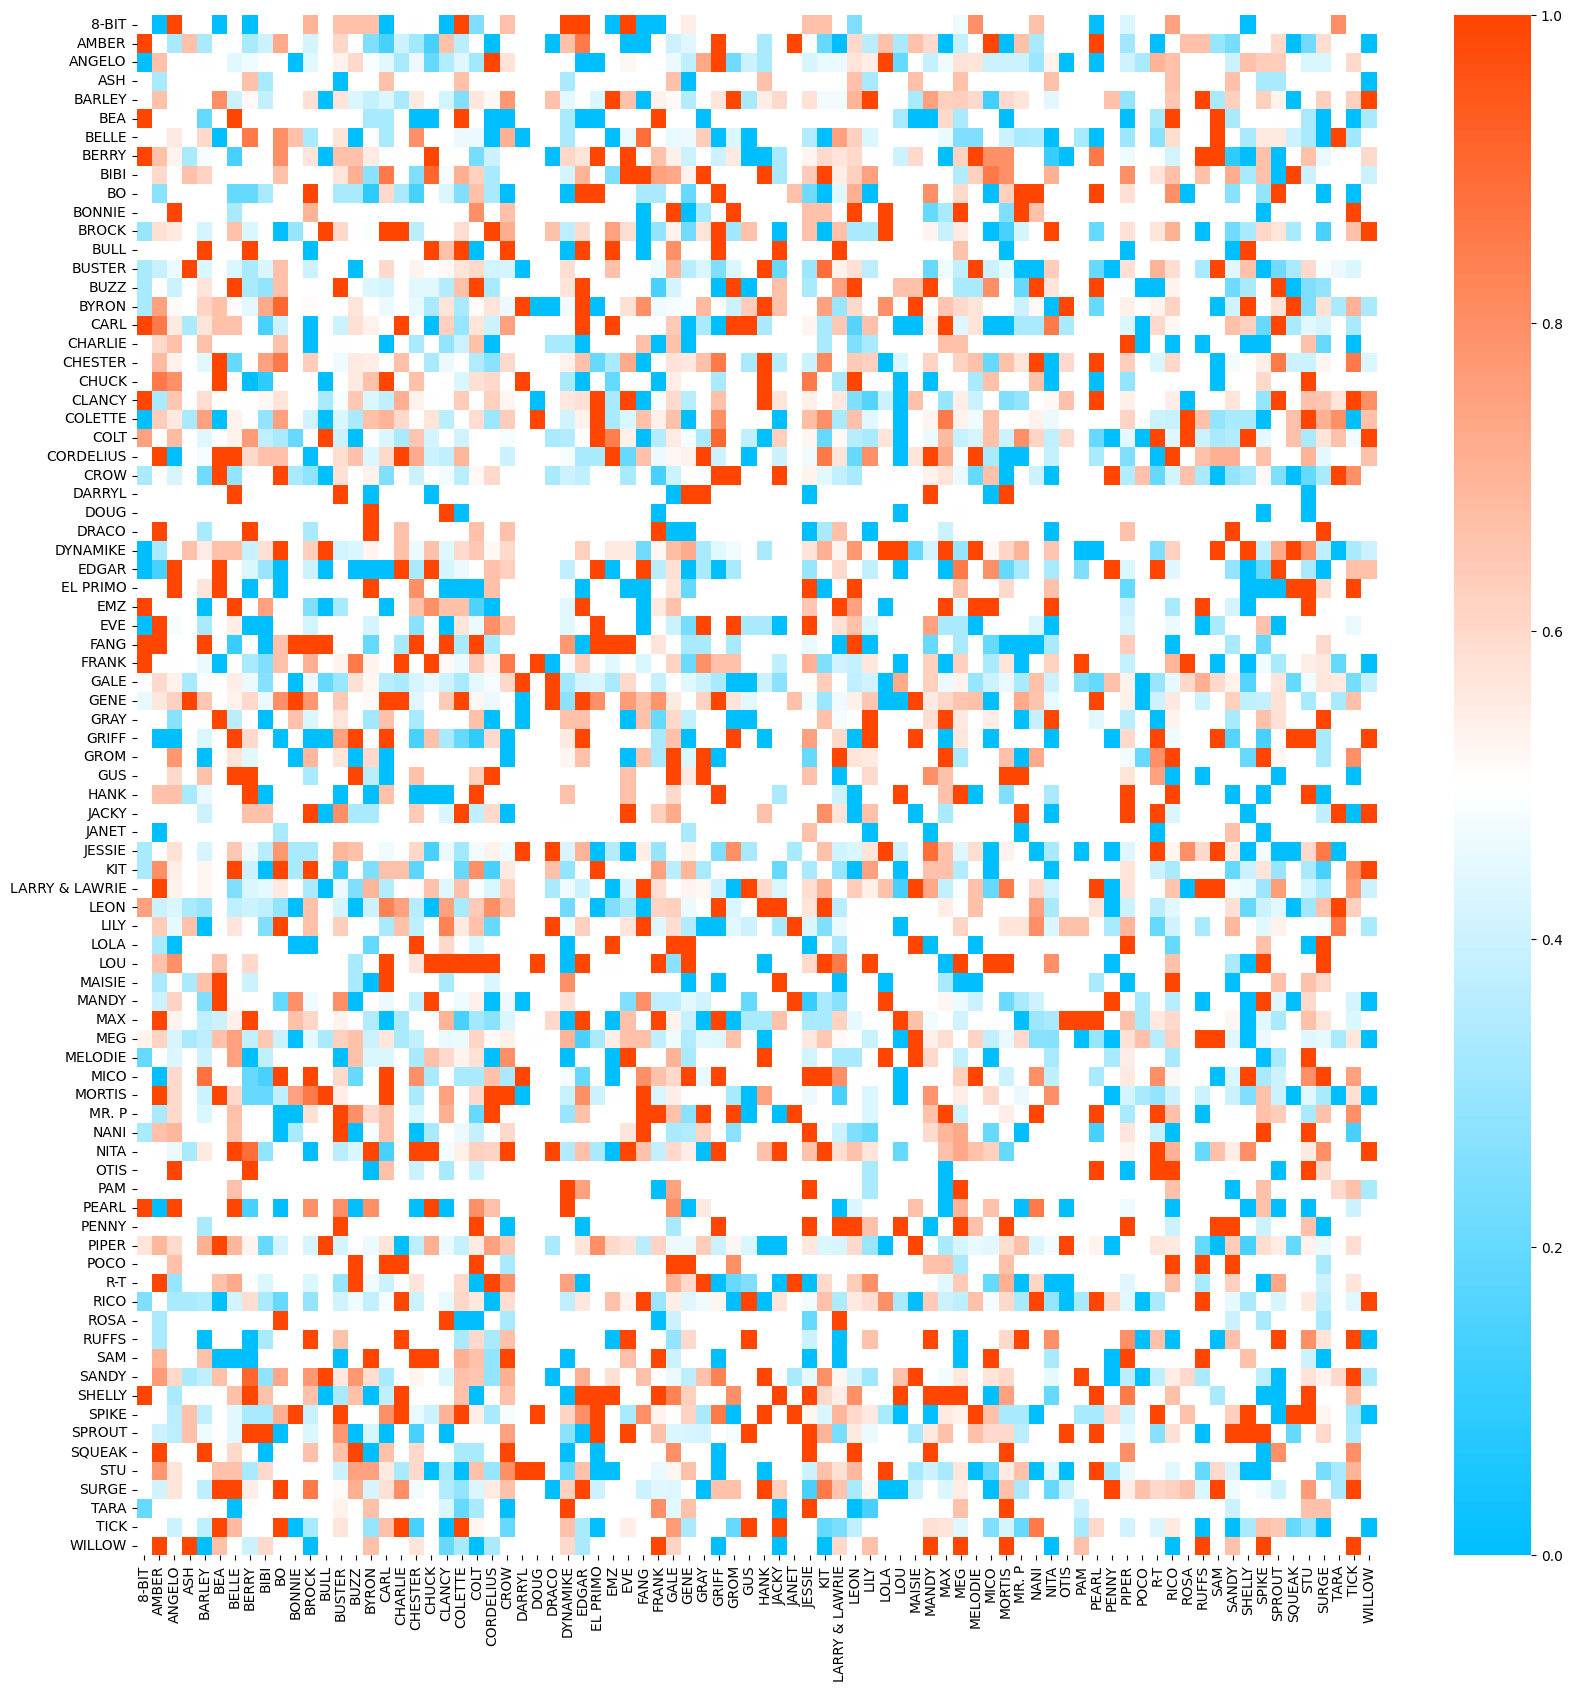

In [6]:
cross_wins = pd.DataFrame(index=brawlers, columns=brawlers)
cross_wins = cross_wins.fillna(0)

cross_games = pd.DataFrame(index=brawlers, columns=brawlers)
cross_games = cross_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler1 in team1:
        for brawler2 in team2:
            if victor == 0:
                continue

            cross_games.loc[brawler1, brawler2] += 1
            cross_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                cross_wins.loc[brawler1, brawler2] += 1
            else:
                cross_wins.loc[brawler2, brawler1] += 1

cross_winrates = cross_wins.div(cross_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(cross_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

cross_winrates.to_csv(os.path.join(output_dir, 'cross_winrates.csv'))
plt.savefig(os.path.join(output_dir, 'heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(cross_winrates)
plt.show()